In [1]:
# optimal threshold for precision-recall curve with logistic regression model
from numpy import argmax, nanargmax, arange
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from matplotlib import pyplot
import pandas as pd

In [2]:
# read data
X = pd.read_csv("featuresMatrix_Preprocessed_OHEColumnsNamed.csv")
y = pd.read_csv("dependentVariableLGAEncoded.csv")

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(testy, yhat)

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/Users/ssabouni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


Best Threshold=0.24, F-Score=0.25
Precision at largest F-Score=0.20, Recall at largest F-score=0.33


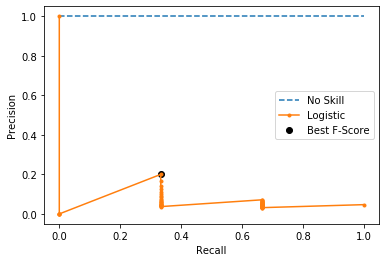

In [3]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

# nanargmax returns the indices of the maximum values in the specified axis ignoring NaNs
# locate the index of the largest f score
ix = nanargmax(fscore)

print('Best Threshold=%.2f, F-Score=%.2f' % (thresholds[ix], fscore[ix]))
print('Precision at largest F-Score=%.2f, Recall at largest F-score=%.2f' % (precision[ix], recall[ix]))


# plot the roc curve for the model
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best F-Score')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

/Users/ssabouni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Best Threshold=0.24, F0.5-Score=0.22
Precision at largest F05 score=0.20, Recall at largest F05 score=0.33


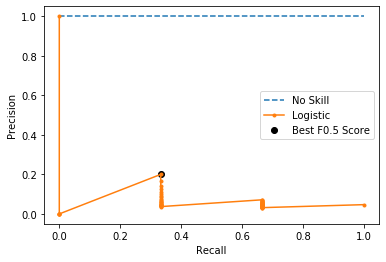

In [4]:
# convert to F0.5 score
beta = 0.5 
f05score = ( (1 + pow(0.5, 2)) * precision * recall ) / (pow(0.5, 2)* precision + recall )

# locate the index of the largest f 0.5 score
ix = nanargmax(f05score)

print('Best Threshold=%.2f, F0.5-Score=%.2f' % (thresholds[ix], f05score[ix]))
print('Precision at largest F05 score=%.2f, Recall at largest F05 score=%.2f' % (precision[ix], recall[ix]))


# plot the roc curve for the model
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best F0.5 Score')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [5]:
# predict labels
yhat = model.predict(testX)
# evaluate the model
f1 = f1_score(testy, yhat)
print('F-Score: %.2f' % f1)

from sklearn.metrics import fbeta_score
f05 = fbeta_score(testy, yhat, beta=0.5)
print('F0.5-Score: %.2f' % f05)

# Therefore, using a 0.5 threshold results in an F1 score of 0
# However, tuning threshold to 0.24 results in F1 score of 0.25

# Therefore, using a 0.5 threshold results in an F0.5 score of 0
# However, tuning threshold to 0.24 results in F0.5 score of 0.22

F-Score: 0.00
F0.5-Score: 0.00


In [6]:
# Another method to find threshold
# Find optimal threshold for F-score

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

# predict labels
yhat = model.predict(testX)
# evaluate the model
score = f1_score(testy, yhat)
print('F-Score: %.5f' % score)

# predict probabilities
yhat = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = yhat[:, 1]

# define thresholds
thresholds = arange(0, 1, 0.001)

# evaluate each threshold
scores = [f1_score(testy, to_labels(probs, t)) for t in thresholds]

# get best threshold
ix = argmax(scores)
print('Threshold=%.2f, F-Score=%.2f' % (thresholds[ix], scores[ix]))


F-Score: 0.00000
Threshold=0.19, F-Score=0.25


In [7]:
# Another method to find threshold
# Find optimal threshold for F05 Score

# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')


# predict labels
yhat = model.predict(testX)
# evaluate the model
f05 = fbeta_score(testy, yhat, beta=0.5)
print('F0.5-Score: %.2f' % f05)

# predict probabilities
yhat = model.predict_proba(testX)

# keep probabilities for the positive outcome only
probs = yhat[:, 1]

# define thresholds
thresholds = arange(0, 1, 0.001)

# define f0.5 score
from sklearn.metrics import fbeta_score
def f05(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=0.5)

# evaluate each threshold
scores = [f05(testy, to_labels(probs, t)) for t in thresholds]

# get best threshold
ix = argmax(scores)
print('Threshold=%.2f, F0.5-Score=%.2f' % (thresholds[ix], scores[ix]))

F0.5-Score: 0.00
Threshold=0.19, F0.5-Score=0.22
